Network Graph Function
====================
Worksheet to create a re-usable, customizable function for creating
network graphs of multiple regressions.

In [ ]:
# automatically reload changes we make to schools.py and ui.py
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


# graphs and viz
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx

import math

from IPython.display import Markdown as md
from school_data import schools, ui


In [3]:
# load the demographic data and merge it with the ELA data
df = schools.load_school_demographics()

# load the data from the csv file
ela = pd.read_csv("ela-combined.csv")


#drop the rows with NaN (where the pop is too small to report)
ela = ela[ela["mean_scale_score"].notnull()]
ela = df.merge(ela, how="inner", on=["dbn", "year"])
ela = ela.query("year == 2019 and category == 'All Students'")

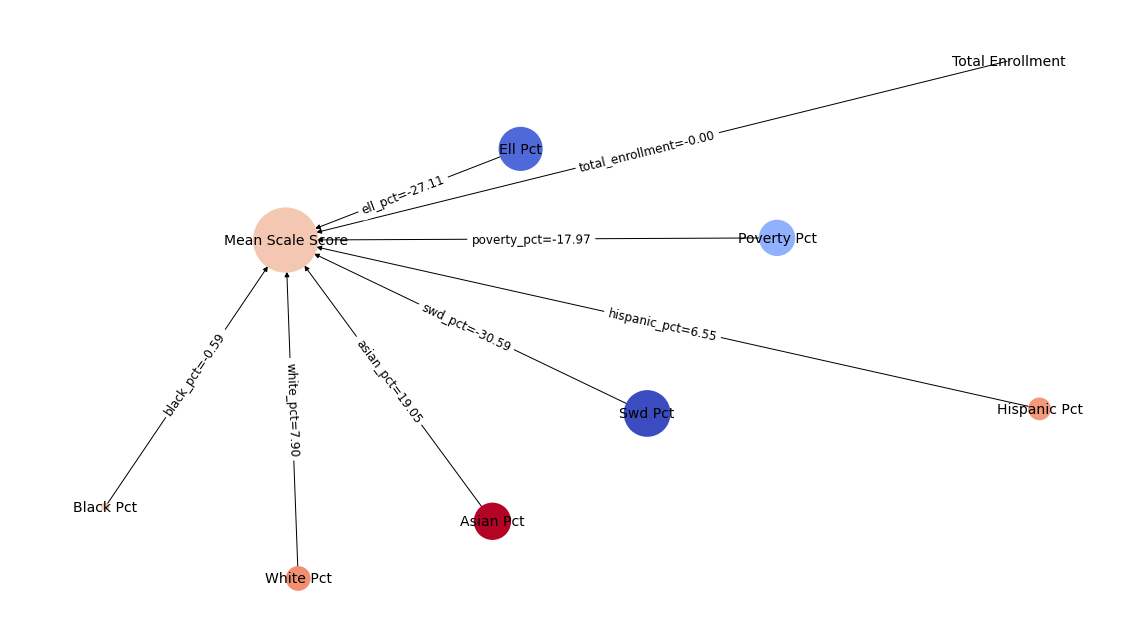

In [4]:
# calculate coefficients for these factors
factors = ['total_enrollment', 'asian_pct',  'black_pct', 
       'hispanic_pct',  'white_pct','swd_pct',  'ell_pct',  'poverty_pct']

# y is the DV
y = ela['mean_scale_score']

X = ela[factors]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

ui.plot_model(model)